-----

### Bank Marketing (Campaign)

<b>Business Problem:</b>

ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).
Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more.

<b>The Data:</b>

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

-----


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [8]:
# Load the dataset
df = pd.read_csv("dataset/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# Shape of the data frame
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

------------------

<b> Week 7: Deliverables </b>

Business understanding

--------------------

<b>Columns Description</b>

- Customer Information: 

1 - age (numeric)

2 - job : type of job (categorical)

3 - marital : marital status (categorical)

4 - education : (categorical)

5 - default: has credit in default? (categorical)

6 - housing: has housing loan? (categorical)

7 - loan: has personal loan? (categorical)

- Communication Information:

8 - contact: contact communication type (categorical)

9 - month: last contact month of year (categorical)

10 - day_of_week: last contact day of the week (categorical)

11 - duration: last contact duration, in seconds (numeric)


- Campaign Information:

12 - campaign: number of contacts performed during this campaign and for this client (numeric)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical)

- social and economic context attributes:

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

- <b>Target</b>:

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [6]:
# Check the numeric columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Check the categorical columns

In [8]:
df["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [9]:
df["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [10]:
df["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [11]:
df["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [12]:
df["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [13]:
df["loan"].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [14]:
df["contact"].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [15]:
df["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [16]:
df["day_of_week"].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [17]:
df["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [18]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

---------------------------

<b> Week 8: Deliverables </b>

What are the problems in the data ( number of NA values, outliers , skewed etc)

--------------------

- No null values
- Analyising each feature to find outliers and other problems with the data

### Univariate analysis
Analysing Communication & Campaign  Information 

Text(0.5, 1.0, 'Contact Counts')

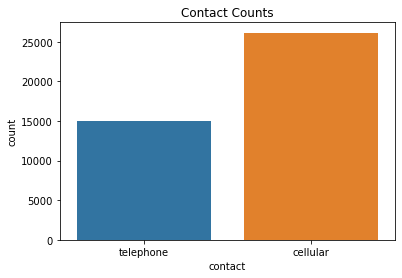

In [6]:
# contact 
sns.countplot(x ='contact' , data= df)
plt.title('Contact Counts')

Text(0.5, 1.0, 'Month Counts')

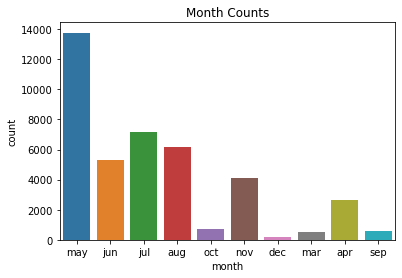

In [8]:
# month
sns.countplot(x ='month' , data= df)
plt.title('Month Counts')

Text(0.5, 1.0, 'Day Counts')

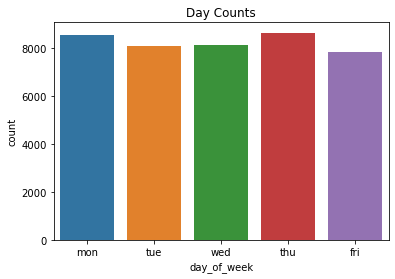

In [9]:
# day of the week
sns.countplot(x ='day_of_week' , data= df)
plt.title('Day Counts')

<AxesSubplot:xlabel='y', ylabel='duration'>

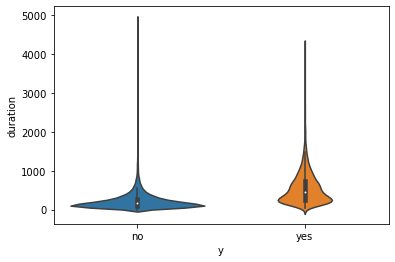

In [10]:
# Duration
sns.violinplot(x="y", y="duration", data=df, size=8)

Text(0.5, 1.0, 'Histogram of campaign')

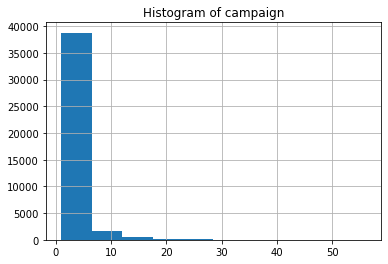

In [11]:
# campaign 
df['campaign'].hist()
plt.title('Histogram of campaign')

Text(0.5, 1.0, 'Histogram of pdays')

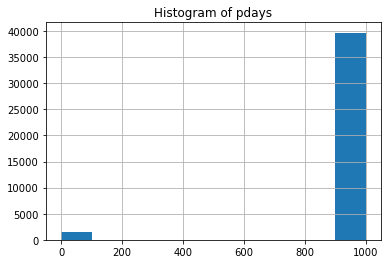

In [12]:
# pdays
df['pdays'].hist()
plt.title('Histogram of pdays')

Text(0.5, 1.0, 'Histogram of previous')

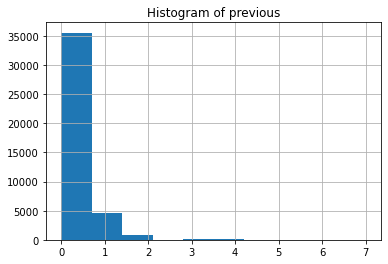

In [13]:
# previous 
df['previous'].hist()
plt.title('Histogram of previous')

---------------------------

<b> Week 9: Deliverables </b>

Data cleansing and transformation done on the data.

--------------------

-  No null values
- Categorical data encoding: pre-process categorical data from words to numeric value to use it in the model. To do this we will use OneHotEncoder() provided by sklearn.
- Encode the target column yes = 1 and no = 0

In [9]:
encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode categorical data
df_encoded = pd.DataFrame(encoder.fit_transform(df[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df = df.drop(cat_cols ,axis=1)
df = pd.concat([df_encoded, df], axis=1)

# Encode target value
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
